# Reading CIFAR-10 data
60,000 images from 10 different dataset


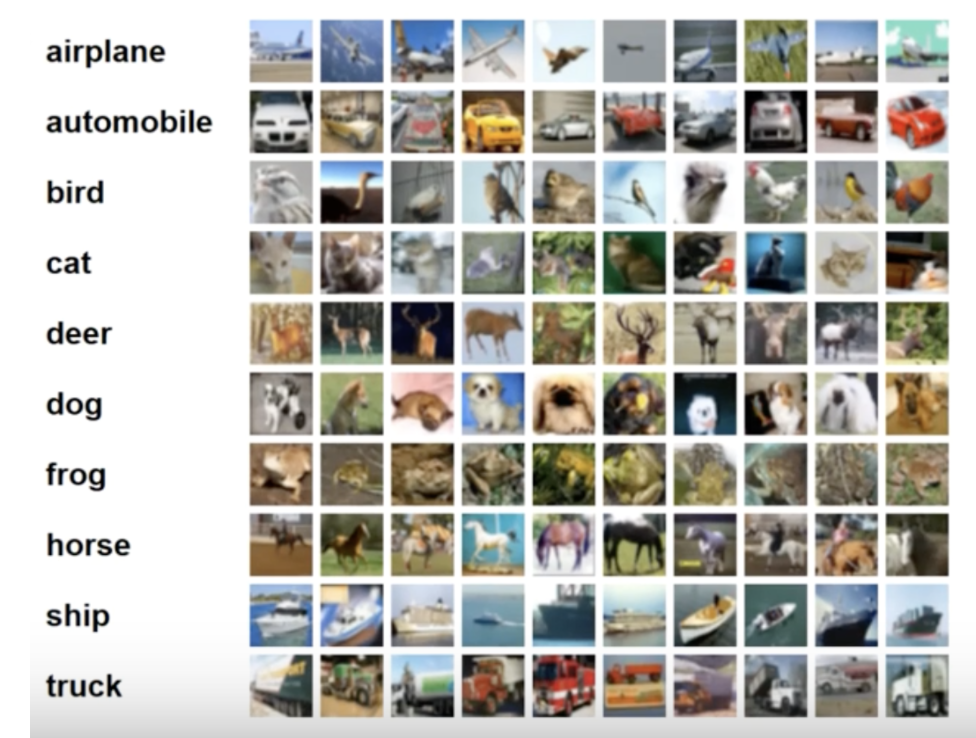

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

"""
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 
training images and 10000 test images.
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains 
exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random 
order, but some training batches may contain more images from one class than another. Between them, the training 
batches contain exactly 5000 images from each class.
"""


def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data


def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names


if __name__ == "__main__":
    """show it works"""

    cifar_10_dir = 'cifar-10-batches-py'

    train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
        load_cifar_10_data(cifar_10_dir)

    print("Train data: ", train_data.shape)
    print("Train filenames: ", train_filenames.shape)
    print("Train labels: ", train_labels.shape)
    print("Test data: ", test_data.shape)
    print("Test filenames: ", test_filenames.shape)
    print("Test labels: ", test_labels.shape)
    print("Label names: ", label_names.shape)

    # Don't forget that the label_names and filesnames are in binary and need conversion if used.

    # display some random training images in a 25x25 grid
    num_plot = 5
    f, ax = plt.subplots(num_plot, num_plot)
    for m in range(num_plot):
        for n in range(num_plot):
            idx = np.random.randint(0, train_data.shape[0])
            ax[m, n].imshow(train_data[idx])
            ax[m, n].get_xaxis().set_visible(False)
            ax[m, n].get_yaxis().set_visible(False)
    f.subplots_adjust(hspace=0.1)
    f.subplots_adjust(wspace=0)
    plt.show() 

Train data:  (50000, 32, 32, 3)
Train filenames:  (50000,)
Train labels:  (50000,)
Test data:  (10000, 32, 32, 3)
Test filenames:  (10000,)
Test labels:  (10000,)
Label names:  (10,)


<Figure size 640x480 with 25 Axes>

In [2]:
print( train_data.shape)

(50000, 32, 32, 3)


# Operation on numpy arrays

In [3]:
x =np.array([[1, 2], [4, 5]], dtype=np.int)
y =np.array([[7, 8], [10, 11]], dtype=np.int)
print(x)
print()
print(y)

[[1 2]
 [4 5]]

[[ 7  8]
 [10 11]]


In [4]:
print(x+y)
print()
print(np.add(x, y))

[[ 8 10]
 [14 16]]

[[ 8 10]
 [14 16]]


In [5]:
print(x-y)
print()
print(np.subtract(x,y))

[[-6 -6]
 [-6 -6]]

[[-6 -6]
 [-6 -6]]


In [6]:
print(x*y)
print()
print(np.multiply(x,y))

[[ 7 16]
 [40 55]]

[[ 7 16]
 [40 55]]


In [7]:
print(x/y)

[[0.14285714 0.25      ]
 [0.4        0.45454545]]


In [8]:
print(np.sqrt(x))

[[1.         1.41421356]
 [2.         2.23606798]]


# Matrix multiplication in numpy

In [9]:
v = np.array([1, 2], dtype=np.int)
w = np.array([7, 8], dtype=np.int)
print(v)
print()
print(w)

[1 2]

[7 8]


In [10]:
#inner product of vectors
print(v.dot(w))

23


In [11]:
#matrix/ vector product
print(x.dot(v))


[ 5 14]


In [12]:
#matrix/matrix product
print(x.dot(y))

[[27 30]
 [78 87]]


# Transpose

In [13]:
print(x)
print()
print(x.T)

[[1 2]
 [4 5]]

[[1 4]
 [2 5]]


# Other useful functions:

In [14]:
x = np.array([[1, 2], 
             [3, 4]])

In [15]:
for func in [x.min, x.max, x.sum]:
    print(func.__name__ ,'=', func())

min = 1
max = 4
sum = 10


In [16]:
print(np.sum(x))
print()
print(np.sum(x, axis=0))
print()
print(np.sum(x, axis=1))

10

[4 6]

[3 7]


In [17]:
print(np.mean(x))
print()
print(np.mean(x, axis=0))
print()
print(np.mean(x, axis=1))

2.5

[2. 3.]

[1.5 3.5]


# Broadcasting
(attachment:1.png)
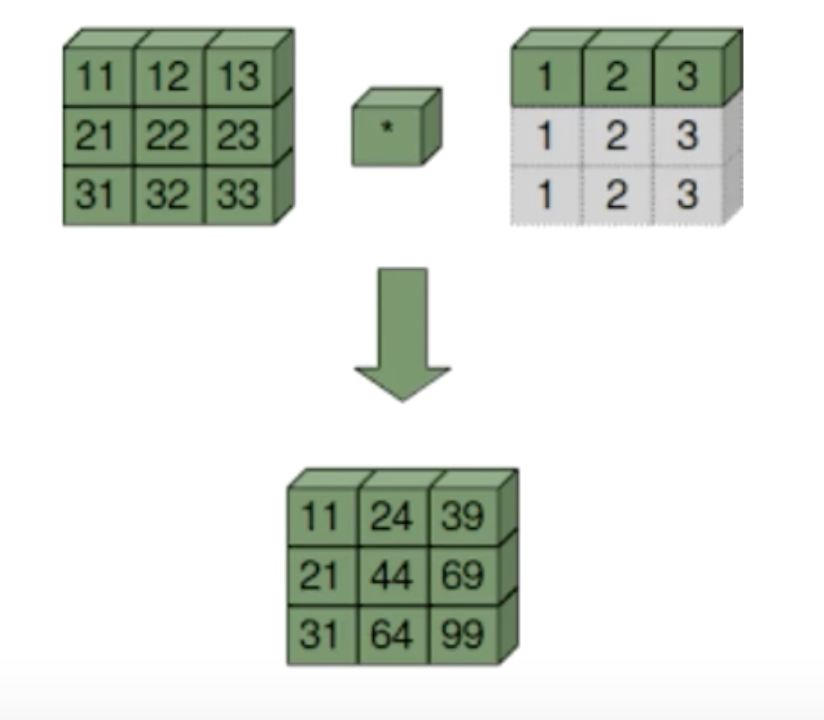


# first rule- dimension

In [18]:
x = np.arange(5).reshape(1, 1, 5) #A 3D array tensor
print(x)

[[[0 1 2 3 4]]]


In [19]:
y = np.array([10, 20, 30, 40, 50])
print(y)

[10 20 30 40 50]


In [20]:
print(x.ndim)
print(y.ndim)

3
1


In [21]:
print(x+y)

[[[10 21 32 43 54]]]


# second rule

In [22]:
x = np.arange(6).reshape(2, 3)
print(x)

[[0 1 2]
 [3 4 5]]


In [23]:
y = np.array([[100], [200]])

In [24]:
print(x+y)

[[100 101 102]
 [203 204 205]]


In [25]:
print(np.zeros_like(x+y))
    

[[0 0 0]
 [0 0 0]]


# Concatenate

In [26]:
D = np.concatenate((x, y), axis = 1)
print(D)

[[  0   1   2 100]
 [  3   4   5 200]]


# Transpose

In [27]:
A = np.arange(24).reshape(4, 2, 3)
print(A)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]]]


In [28]:
B = A.transpose((1, 2, 0))
print(B)

[[[ 0  6 12 18]
  [ 1  7 13 19]
  [ 2  8 14 20]]

 [[ 3  9 15 21]
  [ 4 10 16 22]
  [ 5 11 17 23]]]


In [29]:
B = A.transpose()
print(B)

[[[ 0  6 12 18]
  [ 3  9 15 21]]

 [[ 1  7 13 19]
  [ 4 10 16 22]]

 [[ 2  8 14 20]
  [ 5 11 17 23]]]


# Saving and loading
<h3>Binary format<h3/>

In [30]:
A = np.random.rand(2, 3)
print(A)

[[0.73082989 0.66151261 0.62773216]
 [0.42730303 0.19233089 0.19071252]]


In [31]:
np.save('my_array', A)

In [32]:
C = np.load('my_array.npy')
print(C)

[[0.73082989 0.66151261 0.62773216]
 [0.42730303 0.19233089 0.19071252]]


# <h3>Text format<h3/>

In [33]:
np.savetxt('my_array', A)

In [34]:
b = np.loadtxt('my_array')
print(b)

[[0.73082989 0.66151261 0.62773216]
 [0.42730303 0.19233089 0.19071252]]


# Matplotlib

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 
# in draws the plot here not a new window

In [36]:
x = np.arange(0, 3*np.pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

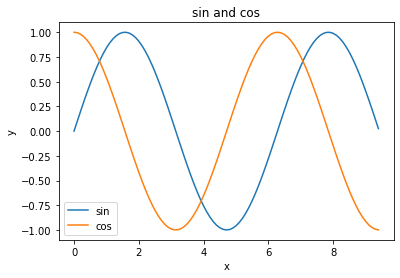

In [37]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.title('sin and cos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['sin', 'cos']);

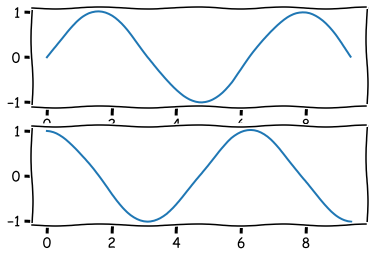

In [38]:
with plt.xkcd():
    plt.subplot(2, 1, 1)
    plt.plot(x, y1)
    
    plt.subplot(2, 1, 2)
    plt.plot(x, y2);

# Scit learn
-need data

-visualization


# Machine Learning
<h3>
Supervised Learning(it has x and y{label})- Regression Data in form

pc learn model from given x, y. model is h(x), we learn it with neural Network, SVM, Regression, deep learning,...
then we test it

- in classification, y is discrete like email

- in Regression, y is real like tempreture, price


<h3/>
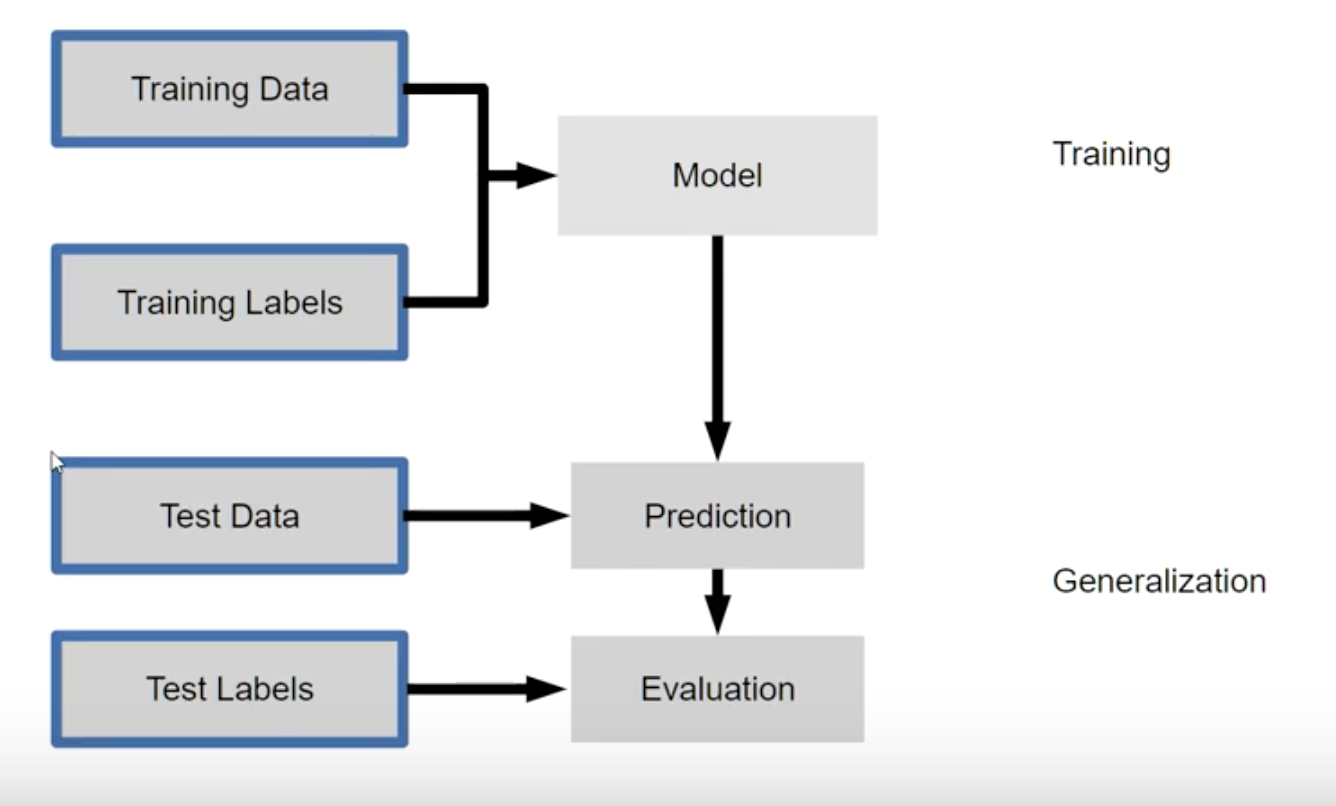


# unsupervised
like news

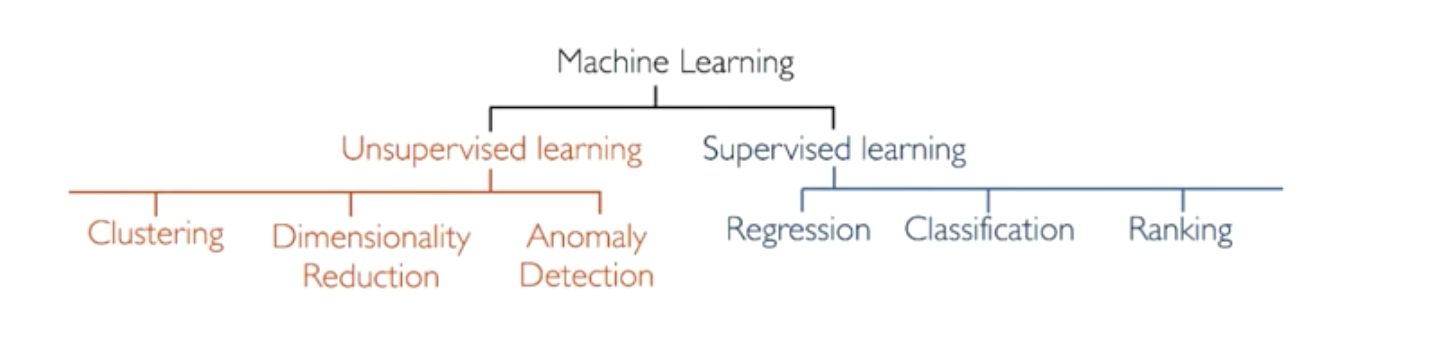

# Scikit-learn

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()

In [40]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [41]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [42]:
print(iris.data.shape)

(150, 4)


In [43]:
n_samples, n_feature = iris.data.shape
print('number of samples:%d' % n_samples)
print('number of feayures:%d' %n_feature)

number of samples:150
number of feayures:4


In [44]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [45]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [51]:
print(type(iris.target))

<class 'numpy.ndarray'>


In [53]:
print(iris.feature_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [59]:
import numpy as np
print(np.unique(iris.target, return_counts=True))

(array([0, 1, 2]), array([50, 50, 50]))


In [66]:
print(iris.target_names)
print(len(iris.target_names))

['setosa' 'versicolor' 'virginica']
3


In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (4, 2)

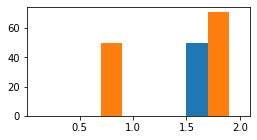

In [87]:
index = 3 #feature number3 
colors = ['red', 'green', 'blue']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data, iris.target)

 

# Loading digit data


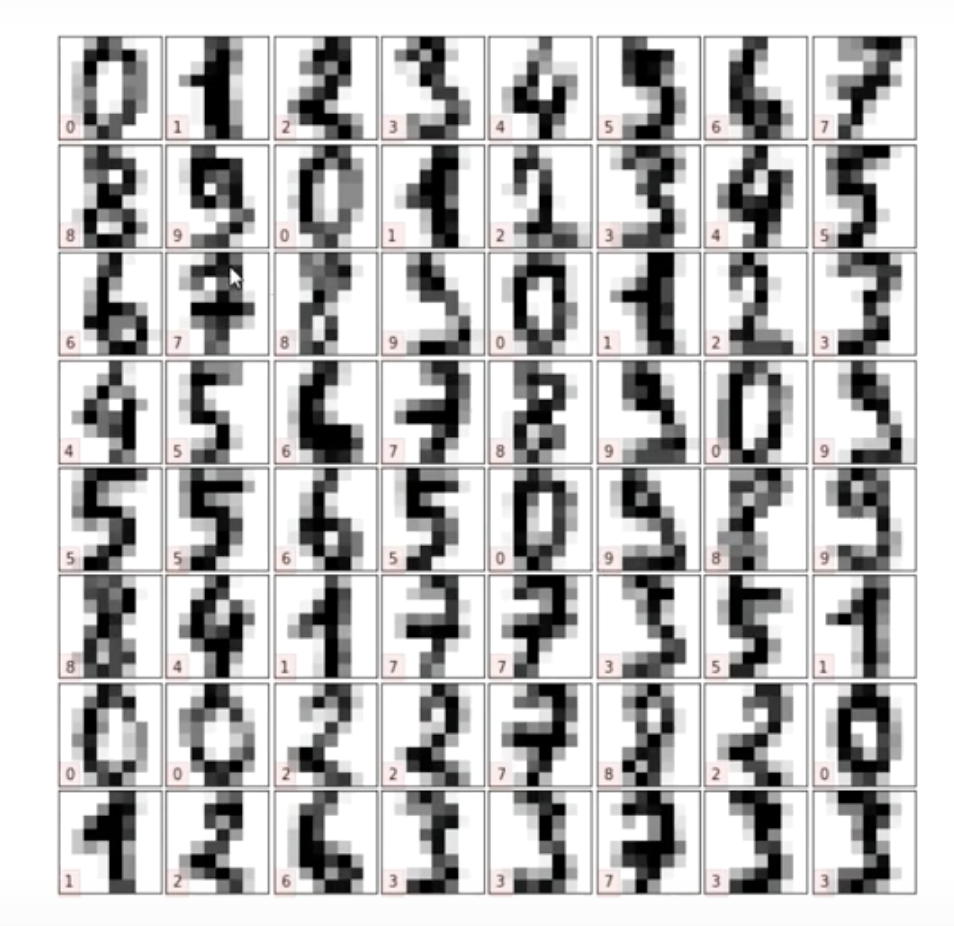

In [88]:
from sklearn import datasets

In [90]:
from sklearn.datasets import load_digits
digit = load_digits()

In [93]:
print(digit.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [97]:
n_samples, n_feature = digit.data.shape
print(n_samples, n_feature)

1797 64


In [98]:
print(digit.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [99]:
print(digit.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [101]:
print(digit.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [102]:
print(digit.data.shape)

(1797, 64)
